# Klasifikacija
Klasifikacija predstavlja jedan od osnovih algoritama nadgledanog mašinskog učenja, koja se koristi u cilju identifikovanja kategorije na osnovu trening podataka. Klasifikacijom, program je obučen pomoću datog dataset-a i klasifikuje nove instance u određeni broj kategorija ili grupa. Termin „nadgledano učenje“ odnosi se na skup trening primera (ulaznih podataka) gde su signali poželjnog izlaza već poznati.

Primena klasifikacije je prisutna i u svakodnevnom životu, gde donosi brojne benefite i olakšava rad  brojnim ekspertizama, a primer za to jeste i klasifikacija u medicinskoj dijagnozi, gde su inputi relevantne informacije koje imamo o pacijentu, a klase su bolesti. Unosi sadrže starost, pol pacijenta, istoriju bolesti i trenutne simptome, pa se na osnovu njih pacijenti klasifikuju u određene klase, odnosno bolesti. 

Ono što je takođe bitno napomenut da klasifikacija može biti binarnog tipa, gde postoje samo dve klase, a osim binarne postoji i multi-class klasifikacija, gde postoje više od dve klase, ali i multi-label gde jedam objekat može pripadati u više klasa i unbalanced u slučaju kada je broj instanci u klasama nejednako raspoređen.

Jedan od interesantnih izazova klasifikacije predstavlja klasifikovanje fotografija, gde je potrebno svakoj fotografiji dodeliti kategoriju kojoj je najverovatnije da će data fotografija pripadati iz fiksnog skupa kategorija. Ovu klasifikaciju je moguće realizovati na dva načina. Prvi je posmatranjem određenih karakteristika uočenim na fotografijama, a drugi je obučavanje duboke neuronske mreže za klasifikovanje fotografija. 
Klasifikacija se odigrava u dve faze, prva je faza treniranja, gde se algoritmu za klasifikaciju pružaju ulazi za koje je poznata oznaka klase i koristeći te ulaze obučava se model. Druga faza je faza testiranja, koja nastupa nakon završenog treninga, gde se naučeni model koristi za predviđanje klasa, sa novim, do tad neviđenim ulazima. 


#Zadatak

Primarni cilj ovog zadatka je da korišćenjem binarnih slika listova, kao i samih karakteristika tih slika, poput oblika, margina i teksture, precizno identifikuje 99 vrsta biljaka. 
Listovi su, zbog svoje zapremine, rasprostranjenosti i jedinstvenih karakteristika, efikasno sredstvo za razlikovanje biljnih vrsta. Oni takođe pružaju interesantan uvod u primenu tehnika klasifikacije koje uključuju i funkcije zasnovane na slikama.

Osnovni set podataka sastoji se od 1584 binarnih fotografija listova, a sam zadatak se satoji od 4 fajla.

*   images.zip -  1584 fotografije listova
*   images.zip - primer fajla koji predstavlja rešenje zadatka
*   train.csv - skup podataka za trening
*   test.csv- skup podataka za testiranje

Fajlovi u kojima su smešteni podaci za trening i testiranje sadrže sledeće kolone:

*   id - jedinstvena oznaka za svaku fotografiju
*   margin_1, margin_2, margin_3, ..., margin_64 - 64 vektora atributa koji predstavlja karakteristike ivica
*  shape_1, shape_2, shape_3, ..., shape_64 - 64 vektora atributa koji predstavlja karakteristike oblika
*  texture_1, texture_2, texture_3, ..., texture_64 - 64 vektora atributa koji predstavlja karakteristike teksture



#Rešenje

S obzirom na spovedena istraživanja i na sam zadatak, odluka je da će se u relaizaciji samog zadatka koristiti XGBoost algoritam. Ovaj algoritam je jedan od najčešće korišćenih, ali i predstavlja veoma svestan algoritam koji se može koristiti za zadatke klasifikacije i regresije. 

Ovaj algoritam je zasnovan na stablu odlučivanja koji koristi okvir za povećanje gradijenta, njegove osnovne prednosti su brzina i performantnost. 
Kako bi se bolje razumelo funkcionisanje samog algoritma neophodno je da se upoznamo i sa narednim pojmovima: stablo odlučivanja, gradijentno pojačavanje, kao i stablo odlučivanja sa gradijentnim povećavanjem.

Stabla odlučivanja stvaraju model koji vrši predviđanje tako što procenjuje niz, odnosno stablo, pitanja „ako-onda-drugo“ tačno/netačno i procenjuje minimalni broj pitanja potrebnih za procenu verovatnoće donošenja ispravne odluke. U jednostavnom primeru ispod, drvo odlučivanja se koristi za procenu cene kuće (oznaka) na osnovu veličine i broja spavaćih soba (karakteristike).
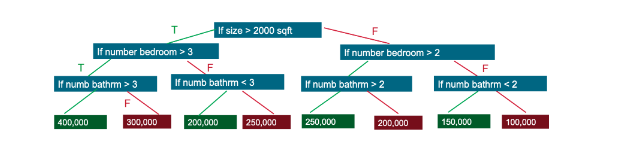

Stabla odlučivanja sa povećanjem gradijenta (GBDT) je algoritam učenja ansambla stabla odluka sličan slučajnoj šumi, za klasifikaciju i regresiju. Algoritmi za učenje ansambla kombinuju više algoritama mašinskog učenja da bi dobili bolji model.

I slučajna šuma i GBDT grade model koji se sastoji od više stabala odlučivanja. Razlika je u tome kako se drveće gradi i kombinuje.

Slučajna šuma koristi tehniku koja se zove bagging da bi paralelno izgradila potpuna stabla odlučivanja od nasumičnih uzoraka za pokretanje skupa podataka. Konačno predviđanje je prosek svih predviđanja stabla odluka.

Termin „pojačavanje gradijenta“ potiče od ideje „pojačanja“ ili poboljšanja jednog slabog modela kombinovanjem sa nizom drugih slabih modela kako bi se stvorio kolektivno jak model. Gradijentno pojačavanje je proširenje pojačanja gde je proces aditivnog generisanja slabih modela formalizovan kao algoritam gradijenta spuštanja preko ciljne funkcije. Pojačavanje gradijenta postavlja ciljane rezultate za sledeći model u nastojanju da se greške svedu na minimum. Ciljani ishodi za svaki slučaj su zasnovani na gradijentu greške (otuda naziv gradijent boosting) u odnosu na predviđanje.

GBDT-ovi iterativno obučavaju ansambl plitkih stabala odlučivanja, pri čemu svaka iteracija koristi ostatke greške prethodnog modela kako bi se uklopila u sledeći model. Konačno predviđanje je ponderisani zbir svih predviđanja stabla. Nasumično „pakiranje“ šuma minimizira varijansu i preopterećenje, dok GBDT „pojačavanje“ minimizira pristrasnost i nedovoljnu ugradnju.

XGBoost je skalabilna i veoma precizna implementacija povećanja gradijenta koja pomera granice računarske snage za pojačane algoritme stabla, a izgrađena je uglavnom za podsticanje performansi modela mašinskog učenja i brzine računara. Sa XGBoost-om, stabla se grade paralelno, umesto sekvencijalno kao GBDT. Sledi strategiju na nivou nivoa, skenirajući preko vrednosti gradijenta i koristeći ove delimične sume za procenu kvaliteta podela na svakom mogućem odvajanju u skupu za obuku.


#Implementacija predloženog rešenja

Prvi korak je importovanje neophodnih biblioteka, a u ovom slučaju su ti sledeće:

**NumPy** (Numerical Python) je Pajtonova biblioteka otvorenog koda koja predstavlja univerzalni standard za rad sa numeričkim podacima u Pajtonu. Biblioteka sadrži višedimenzionalne nizove podataka i matrice i omogućava izvođenje matematičkih operacija nad njima. NumPy garantuje efikasne proračune i isporučuje ogromnu biblioteku matematičkih funkcija na visokom nivou.

**Pandas** je biblioteka napisana za Pajton kako bi omogućila manipulaciju podacima i analizu istih. Pandas omogućava importovanje podataka u različitim formatima kao što su CSV, JSON, SQL, Excel. Takođe, omogućava i različite manipulacije podacima kao što su spajanje, selektovanje, promijena oblika, čišćenje podataka.

In [1]:
import numpy as np 
import pandas as pd 

Naredni korak je povezivanje Google Colab-a sa Google Drive-om kako bi omogućili importovanje fajlova koji su dobijeni u sklopu projektnog zadatka, a smešeni su u okviru Google Drive-a.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Željeni fajlovi su zipovani, pa ih je neophodno otpakovati, što se izvršava korišćenjem !unzip komande.

In [3]:
!unzip /content/drive/MyDrive/#4.zip

Archive:  /content/drive/MyDrive/#4.zip
  inflating: images.zip              
  inflating: sample_submission.csv.zip  
  inflating: test.csv.zip            
  inflating: train.csv.zip           


Nakon što je Google Colab povezan sa Google Drive-om, vrši se importovanje podataka koji se nalaze u fajlu 'train.csv'. U ovu svrhu koristi se Pandas biblioteka, a importovanje podataka se realizuje korišćenjem komande 'read_csv' iz prethodno pomenute biblioteke. Takođe, u sklopu te komande postavlja se kolona 'id' kao indeksna kolona.

Nakon toga vrši se prikaz tabele, pozivanjem njenog naziva.

In [4]:
train_dir = '/content/train.csv.zip'
train_data = pd.read_csv(train_dir,index_col='id')
train_data

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,
1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,0.001953,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,0.029297,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,0.003906,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953


S obzirom na to da algoritmi mnogo bolje manipulišu numeričkim vrednostima, u odnosu na kategoričke. U zadatku, kategorije su predstavljene tekstualno, a u cilju postizanja što boljih rezultata potrebno je izvršiti enkodiranje tekstučanih vrednosti u numeričke, pa je u tu svrhu koriščen LabelEncoder iz Sklearn biblioteke, koja ima set modela i alata spremnih za treniranje-od predprocesiranja podataka pa do obuke modela i procijene performansi.

In [5]:
from sklearn.preprocessing import LabelEncoder
y = train_data['species']
le = LabelEncoder().fit(y)
labels = le.transform(y) 
classes = list(le.classes_) 
print(classes)


['Acer_Capillipes', 'Acer_Circinatum', 'Acer_Mono', 'Acer_Opalus', 'Acer_Palmatum', 'Acer_Pictum', 'Acer_Platanoids', 'Acer_Rubrum', 'Acer_Rufinerve', 'Acer_Saccharinum', 'Alnus_Cordata', 'Alnus_Maximowiczii', 'Alnus_Rubra', 'Alnus_Sieboldiana', 'Alnus_Viridis', 'Arundinaria_Simonii', 'Betula_Austrosinensis', 'Betula_Pendula', 'Callicarpa_Bodinieri', 'Castanea_Sativa', 'Celtis_Koraiensis', 'Cercis_Siliquastrum', 'Cornus_Chinensis', 'Cornus_Controversa', 'Cornus_Macrophylla', 'Cotinus_Coggygria', 'Crataegus_Monogyna', 'Cytisus_Battandieri', 'Eucalyptus_Glaucescens', 'Eucalyptus_Neglecta', 'Eucalyptus_Urnigera', 'Fagus_Sylvatica', 'Ginkgo_Biloba', 'Ilex_Aquifolium', 'Ilex_Cornuta', 'Liquidambar_Styraciflua', 'Liriodendron_Tulipifera', 'Lithocarpus_Cleistocarpus', 'Lithocarpus_Edulis', 'Magnolia_Heptapeta', 'Magnolia_Salicifolia', 'Morus_Nigra', 'Olea_Europaea', 'Phildelphus', 'Populus_Adenopoda', 'Populus_Grandidentata', 'Populus_Nigra', 'Prunus_Avium', 'Prunus_X_Shmittii', 'Pterocarya_S

Nakon toga je potrebno izvršiti uklananje kolone species, koristeći funkciju drop() koja sadrži tri argumenta, a to su redom: columns - naziv kolone koju brišemo axis - oznaka da se briše kolona inplace - izvrši operaciju bez povratne vrednosti

In [6]:
train_data.drop(columns='species',axis=1,inplace=True)
X = train_data
X

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,
1,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
2,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
3,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
5,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
6,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,0.001953,0.042969,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
1578,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,0.029297,0.003906,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
1581,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,0.003906,0.000000,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953


Kao što je već napomenuto, XGBoost algoritam podrazumeva stvaranje i dodavanje stabala odlučivanja uzastopno, pri čemu svaki pokušaj ispravlja greške prethodnog pokušaja. Obzirom na to postavlja se pitanje koliko stabala treba konfigurisati i koliko svako od tih stabala treba da ima nuvoa.

Broj stabala za klasu 'XGBClassifier' je definisan parametrom 'n_estimators'. Ovim parametrom definisan je opseg od 200 do 401 stabala sa korakom od 100 što znači da može biti 200, 300 ili 400 stabala.

Kao što je već napomenuto, ovaj alogoritam se zasniva na tome da se stalno kreiraju nova stabla koja ispravljaju greške prethodnih pa može doći do 'overfitting-a', a to znači da je model naučio detalje i da je dobro istrenirao trening podatke, ali to može imati za posledicu da lošije trenira nove podatke, međutim i mali broj stabala može da dovede do toga da model nije dovoljno obučen. Upravo iz tih razloga značajan parametar ovog algoritma jeste 'learning_rate' jer on određuje koliko model brzo uči. Manja vrednost 'learning_rate' će zahtevati više stabala, što znači i više vremena potrebnog za trening.Ovaj parametar može da ima vrednost l/1000, gdje je l u opsegu od 5 do 15, sa razmakom od 10 što znači da je vrednost parametra 5/1000, odnosno 0,005.

Još jedan parameter je 'max_depth' kojim se definiše broj nivoa, odnosno dubina stabla. Ovaj parametar je definisan u opsegu od 6 do 20, sa korakom od 5, što znači da su moguće vrednosti 6,11,16.

In [7]:
parameters = parameters = {
    'n_estimators': list(range(200,401,100)),
    'learning_rate':[l/1000 for l in range (5,15,10)],
    'max_depth': list(range(6,20,5)) 
}           
parameters

{'learning_rate': [0.005],
 'max_depth': [6, 11, 16],
 'n_estimators': [200, 300, 400]}

sklearn.metrics - predstavlja modul koji sadrži skup jednostavnih funkcija koje služe za mjerenje greške predviđanja. XGBClassifier- implementacija scikit-learn API za XGBoost klasifikaciju.

In [8]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import log_loss ,accuracy_score
from matplotlib import pyplot

GridSearchCV(GridSearch with Cross-Validation) predstavlja pretragu najboljih parametara za određeni skup podataka ili za model.Ovo je jako važno jer performanse modela zavise od njegovih parametara.Ne postoji način da se unapred odrede najbolji parametri, pa je najbolje isprobati kombinacije svih mogućih, međutim kada bi to radili ručno oduzelo bi previše vremena i resursa pa se zato koristi GridSearchCV za automatizaciju pronalaska najoptimalnijih parametara.

estimator - instanca modela za koju želimo da proverimo parametre param_grid - parametri koje želimo da testiramo n_jobs - broj procesa koji želimo paralelno pokretati za ovaj zadatak verbose - određuje detaljnost prikazivanja poruke kao rezultata izvršavanja scoring - 'neg_log_loss'-je funkcija iz modula sklearn metrics koja služi za merenje greške predviđanja, što je manja povratna vrednost ove funkcije to je bolje, odnosno manja je greška predviđanja

In [9]:
gsearch = GridSearchCV(estimator=XGBClassifier(),
                       param_grid = parameters, 
                       scoring= 'neg_log_loss',
                       n_jobs=4,cv=5, verbose=7)

In [10]:
gsearch
print(gsearch)

GridSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=4,
             param_grid={'learning_rate': [0.005], 'max_depth': [6, 11, 16],
                         'n_estimators': [200, 300, 400]},
             scoring='neg_log_loss', verbose=7)


Sledeći korak jeste treniranje modela kako bi kao rezultat dobili najoptimalnije parametre.

In [11]:
gsearch.fit(X,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=4,
             param_grid={'learning_rate': [0.005], 'max_depth': [6, 11, 16],
                         'n_estimators': [200, 300, 400]},
             scoring='neg_log_loss', verbose=7)

Nakon što smo istrenirali model za pronalazak najboljih parametara, izdvajamo te parametre u narednim koracima.

In [12]:
best_n_estimators = gsearch.best_params_.get('n_estimators')
best_n_estimators


400

In [13]:
best_learning_rate = gsearch.best_params_.get('learning_rate')
best_learning_rate

0.005

In [14]:
best_max_depth = gsearch.best_params_.get('max_depth')
best_max_depth

6

Sledi korak kreiranja finalnog modela i prosleđivanje tom modelu vrednosti parametara koje smo dobili u prethodnom koraku.

Metode fit() i predict() su iz scikit-learn biblioteke, a objekat koji implementira ove metode jeste 'Estimator'. Fit() metoda vrši treniranje modela koji smo napravili. Poseduje sledeće argumente:

X - predstavlja numeričke podatke iz tabele na osnovu kojih se vrši klasifikacija y - predstavlja klase za klasifikovanje eval-metric - metrike za evaluaciju treninga modela eval-set - set nad kojim se vrši evaluacija Fit metoda obavlja brojne operacije, prvo briše sve atribute koju su uskladišteni u 'Estimatoru', zatim vrši proveru parametara i validaciju podataka i na kraju vrši se treniranje modela.

Kao rezultat, nakon svake epohe, odnosno nakon što se doda novo stablo prikazuje se greška klasifikacije i vrednost 'log loss'. Logg loss prikazuje posle koje epohe učenje modela kreće da opada, a greška klasifikacije ukazuje kolike su greške u klasifikaciji nakon svake epohe.

In [15]:
eval_set = [(X, y)]

final_model = XGBClassifier(n_estimators=best_n_estimators,
                            learning_rate=best_learning_rate,
                            max_depth=best_max_depth)

train=final_model.fit(X,y, eval_metric=["merror", "mlogloss"],eval_set=eval_set,verbose=True)

[0]	validation_0-merror:0.738384	validation_0-mlogloss:4.57356
[1]	validation_0-merror:0.679798	validation_0-mlogloss:4.55187
[2]	validation_0-merror:0.621212	validation_0-mlogloss:4.53012
[3]	validation_0-merror:0.610101	validation_0-mlogloss:4.50841
[4]	validation_0-merror:0.585859	validation_0-mlogloss:4.48682
[5]	validation_0-merror:0.585859	validation_0-mlogloss:4.46553
[6]	validation_0-merror:0.577778	validation_0-mlogloss:4.44424
[7]	validation_0-merror:0.568687	validation_0-mlogloss:4.42293
[8]	validation_0-merror:0.563636	validation_0-mlogloss:4.40181
[9]	validation_0-merror:0.547475	validation_0-mlogloss:4.38059
[10]	validation_0-merror:0.551515	validation_0-mlogloss:4.35956
[11]	validation_0-merror:0.540404	validation_0-mlogloss:4.33831
[12]	validation_0-merror:0.538384	validation_0-mlogloss:4.31726
[13]	validation_0-merror:0.540404	validation_0-mlogloss:4.29627
[14]	validation_0-merror:0.536364	validation_0-mlogloss:4.27535
[15]	validation_0-merror:0.527273	validation_0-mlo

Dobijene vednosti se vizualizuju dijagramom kako bi bilo preglednije za korisnike.

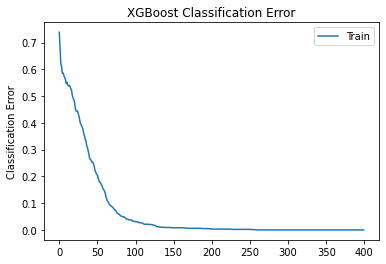

In [16]:
results = final_model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

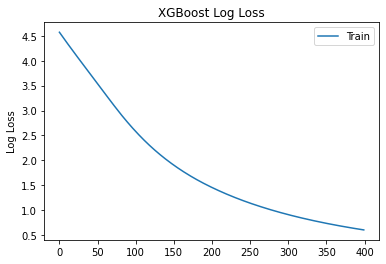

In [17]:
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

Nakon što je model istreniran izvršava se predviđanje na test skupu podataka. Da bismo to izvršili poziva se funkcija predict_proba() koja koristi naučene parametre fit() metode kako bi predvidjela nove, do sada neviđene test podatke.

In [18]:
test_data = pd.read_csv('/content/test.csv.zip')
test_index = test_data.id 
test_data.drop('id',axis=1,inplace=True)
pred_test = final_model.predict_proba(test_data)
pred_test

array([[0.00872758, 0.00870935, 0.00873068, ..., 0.00875932, 0.00925316,
        0.0087665 ],
       [0.00384367, 0.00383564, 0.01773704, ..., 0.00385765, 0.00383308,
        0.00384687],
       [0.00635229, 0.26093027, 0.00628517, ..., 0.00630579, 0.00626563,
        0.00986398],
       ...,
       [0.00448846, 0.0075374 , 0.00449005, ..., 0.00450478, 0.00447609,
        0.00449219],
       [0.0092595 , 0.00940887, 0.01072905, ..., 0.00929317, 0.00923399,
        0.00926721],
       [0.0036178 , 0.00689475, 0.00361909, ..., 0.00363096, 0.00360783,
        0.00362082]], dtype=float32)

DataFrame je dvodimenzionalna struktura podataka koja omogućava smeštanje prethodno dobijenih podataka u kolone, dok se u zaglavlju kolona nalaze klase, odnosno različite biljne vrste.

In [19]:
submission = pd.DataFrame(pred_test, columns=classes)
submission.insert(0, 'id', test_index)
submission.to_csv('submission.csv', index=False)